# Entanglement

This notebook demonstrates the concept of quantum entanglement.

Logging in takes a significant amount of time. We'll keep it in a separate cell so that we needn't run it unnecessarily.

In [15]:
import qiskit
from qiskit.tools import monitor, visualization

token = 'b31e17bcc5a9d0469103bbbc491f7bd73f28b85be7b595fd8f62379f7998aa2c19868d652b41fe56042380921cfb100153da41ff08878a743d84342e6a64d434'
qiskit.IBMQ.save_account(token, overwrite=True)
qiskit.IBMQ.load_account()
computer = qiskit.IBMQ.get_provider('ibm-q').get_backend('ibmq_16_melbourne')

Credentials are already in use. The existing account in the session will be replaced.


Let's create a quantum circuit.

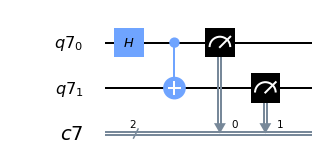

In [16]:
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw(output='mpl')

Let's simulate the circuit on a classical computer.

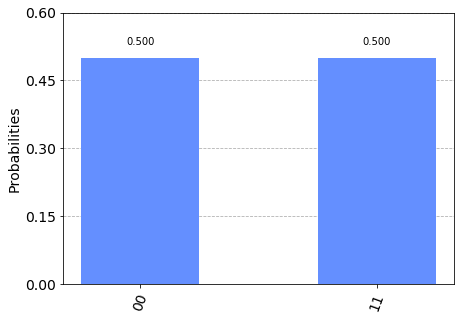

In [17]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator')).result()
visualization.plot_histogram(result.get_counts(circuit))

Now let's run it on a real quantum computer. Keep an eye on the job status in the output - it automatically updates in real time.

Job Status: job has successfully run


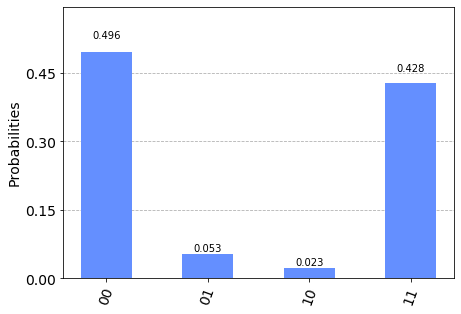

In [18]:
job = qiskit.execute(circuit, backend=computer)
monitor.job_monitor(job)
result = job.result().get_counts(circuit)
visualization.plot_histogram(result)

Upon execution, we can see that today's quantum computers have a small, yet easily noticable, amount of error.